In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, LabelEncoder
import numpy as np
import pandas as pd
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
from torch.nn.functional import cross_entropy

In [52]:
DATA = '_02195759eb952fcd23b60d5b07594b7b_winequality-red.csv'

with open(DATA) as file:
    file.readline() # miss header line
    data = np.loadtxt(file, delimiter=';')

In [53]:
TRAIN_SIZE = 0.7

y = data[:, -1]
np.place(y, y < 5, 5)
np.place(y, y > 7, 7)
y -= y.min()
X = data[:, :-1]
X = normalize(X)

y_encoded = pd.get_dummies(y, prefix='rate')
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded.values, train_size=TRAIN_SIZE, random_state=0)

In [98]:
in_features, out_features = X.shape[1], y_encoded.shape[1]
HIDDEN_NEURONS_NUM = 100
lr = 0.1

In [109]:
model = torch.nn.Sequential(
    nn.Linear(in_features=in_features, out_features=HIDDEN_NEURONS_NUM),
    nn.ReLU(),
    nn.Linear(in_features=HIDDEN_NEURONS_NUM, out_features=out_features),
    nn.Softmax(dim=1)
)
model

Sequential(
  (0): Linear(in_features=11, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
  (3): Softmax(dim=1)
)

In [110]:
loss_fn = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=lr)

In [111]:
X_train, y_train = torch.tensor(X_train, dtype=torch.float, requires_grad=True), torch.tensor(y_train, dtype=torch.long)
X_test, y_test = torch.tensor(X_test, dtype=torch.float, requires_grad=True), torch.tensor(y_test, dtype=torch.long)

/Users/macair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.
/Users/macair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [112]:
def train(num_epochs):
    losses = []
    for _ in range(num_epochs):
        preds = model(X_train)
        loss = loss_fn(preds, y_train)
        loss.backward()
        optim.step()
        losses.append(loss.item())
        optim.zero_grad()
    return losses

In [113]:
def plot(losses):
    fig = plt.figure(figsize=(10, 8))
    plt.scatter(range(len(losses)), losses, linewidths=3)
    plt.grid()
    plt.xlabel('num_epochs')
    plt.ylabel('CrossEntropyLoss')
    plt.show()

In [114]:
MAX_EPOCHS = 300

In [115]:
losses = train(MAX_EPOCHS)

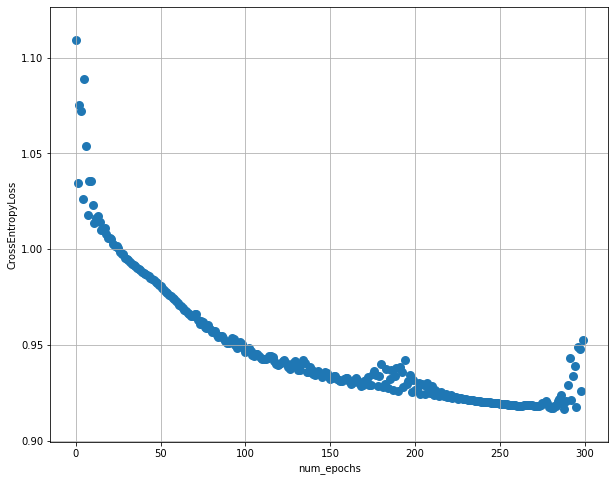

In [116]:
plot(losses)

In [117]:
model.train(False)
preds = model(X_test)
print(cross_entropy(preds, y_test))

tensor(0.9051, grad_fn=<NllLossBackward>)
